# Backtesting SMA trading strategy using Vectorbt API

### Source code: 
https://pypi.org/project/vectorbt/ , https://vectorbt.dev/docs/index.html

In [1]:
# Import libraries
import vectorbt as vbt
import numpy as np
import pandas as pd
import plotly.io as pio

pio.renderers.default = 'svg' # comment this line out to get interactive charts

In [2]:
# Pull hostorical prices
price = vbt.YFData.download('ETH-USD', freq='D', fees=0.01, missing_index='drop').get('Close')
# Select time window to test.
price = price.loc["2015":"2021"]
price

Date
2015-08-07 00:00:00+00:00       2.772120
2015-08-08 00:00:00+00:00       0.753325
2015-08-09 00:00:00+00:00       0.701897
2015-08-10 00:00:00+00:00       0.708448
2015-08-11 00:00:00+00:00       1.067860
                                ...     
2021-07-08 00:00:00+00:00    2120.026367
2021-07-09 00:00:00+00:00    2146.692383
2021-07-10 00:00:00+00:00    2111.403564
2021-07-11 00:00:00+00:00    2139.664795
2021-07-12 00:00:00+00:00    2155.748047
Name: Close, Length: 2163, dtype: float64

In [3]:
# Define shor and long SMA windows. Test different window combinations to see results of Buy & Hold vs SMA strategy
fast_ma = vbt.MA.run(price, 10)
slow_ma = vbt.MA.run(price, 20)
entries = fast_ma.ma_above(slow_ma, crossover=True)
exits = fast_ma.ma_below(slow_ma, crossover=True)

# Fit the model and input starting investment to calculate total profit form the trading stategy
pf = vbt.Portfolio.from_signals(price, entries, exits, init_cash=100)
pf.total_profit()

693562.0664890904

In [4]:
# Calculate total profit from the Buy & Hold strategy
pf1 = vbt.Portfolio.from_holding(price, init_cash=100)
pf1.total_profit()

77665.32212550766

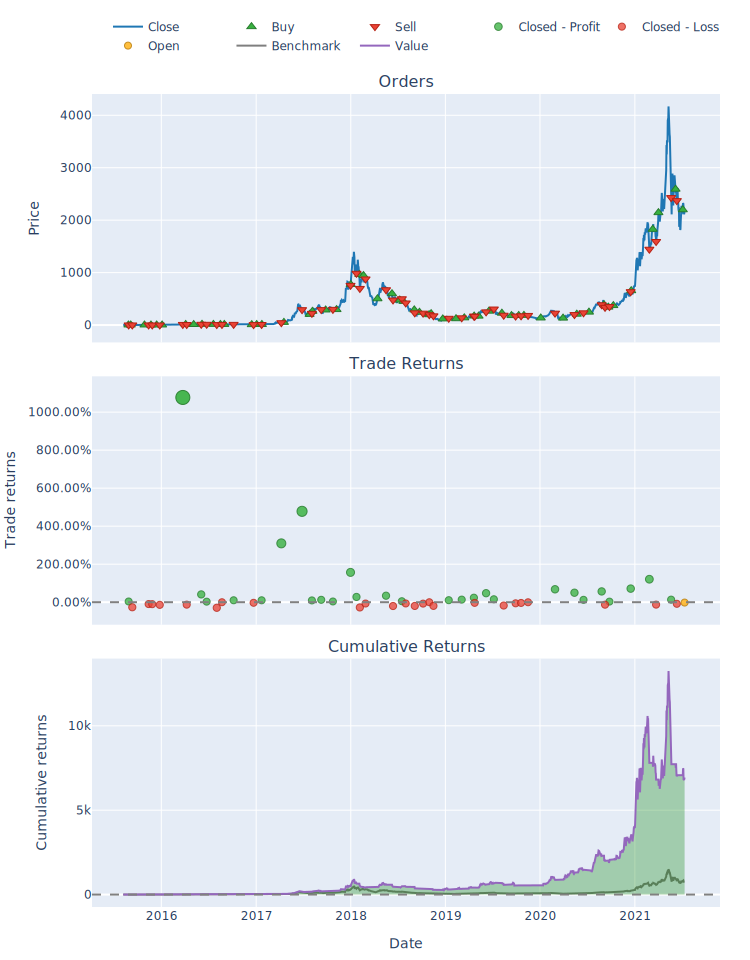

In [5]:
# Plot trading strategy
pf.plot().show()

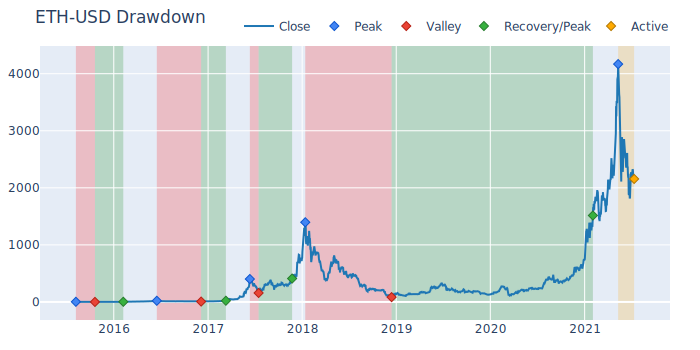

In [6]:
# Plot drawdown for the selected strategy
price.vbt.drawdowns.plot(title='ETH-USD Drawdown').show()

In [7]:
# Obtain complete stats for the trading strategy
pf.stats(freq='D')

Start                     2015-08-07 00:00:00+00:00
End                       2021-07-12 00:00:00+00:00
Duration                         2163 days 00:00:00
Initial Cash                                  100.0
Total Profit                          693562.066489
Total Return [%]                      693562.066489
Benchmark Return [%]                   77665.322126
Position Coverage [%]                     55.709663
Max Drawdown [%]                          70.083985
Avg Drawdown [%]                          12.796049
Max Drawdown Duration             760 days 00:00:00
Avg Drawdown Duration    30 days 02:07:03.529411765
Trade Count                                      52
Win Rate [%]                              53.846154
Best Trade [%]                          1077.080688
Worst Trade [%]                          -29.422837
Avg Trade [%]                             46.313097
Max Trade Duration                 80 days 00:00:00
Avg Trade Duration       23 days 00:27:41.538461538
Expectancy  